## How to use contours to view global data

We will look at a couple of datasets and see how best to view them with contours instead of rendering everything as a global image. We have global strain rate and global sea-floor age. Both datasets have holes in them !

In [6]:
%pylab inline

import cartopy
import gdal
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [8]:
global_extent     = [-180.0, 180.0, -90.0, 90.0]
globalmarble      = gdal.Open("Resources/BlueMarbleNG-TB_2004-06-01_rgb_3600x1800.TIFF")
globalmarble_img  = globalmarble.ReadAsArray().transpose(1,2,0)
globaletopo       = gdal.Open("Resources/color_etopo1_ice_low.tif")
globaletopo_img   = globaletopo.ReadAsArray().transpose(1,2,0)

In [9]:
# Global strain rate data - from Unavco

strainrate_extent=[-180,180,-68,80]
strainrate = numpy.loadtxt("Resources/sec_invariant_strain_0.2.dat")
strainrate_data = strainrate.reshape(741,1800,3)  # I had to look at the data to work this out !
strainrate_img  = strainrate_data[:,:,2]


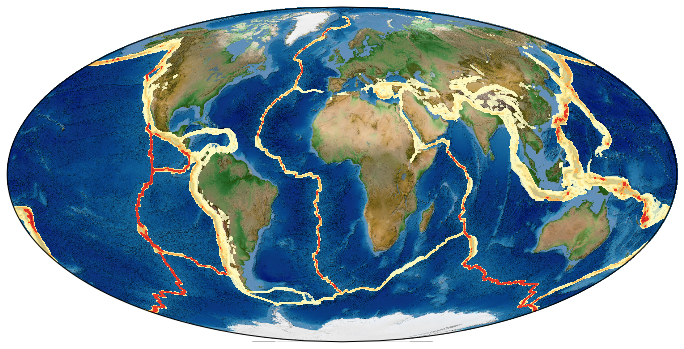

In [10]:
projection1 = ccrs.Orthographic(central_longitude=140.0, central_latitude=0.0, globe=None)
projection2 = ccrs.Mollweide()

base_projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.subplot(111, projection=projection2)
ax.set_global()
ax.imshow(globaletopo_img, origin='upper', transform=base_projection, extent=global_extent, zorder=0)
ax.imshow(globalmarble_img, origin='upper', transform=base_projection, extent=global_extent, alpha=0.5, zorder=1)

ax.contourf(strainrate_data[:,:,0], strainrate_data[:,:,1], strainrate_data[:,:,2], 
         levels=[20,30,40,50,60,70,80,90,100,300,500,1000], linewidth=0.0,
         transform=base_projection,  cmap="YlOrRd", zorder=2, alpha=0.8, extent=strainrate_extent)


plt.show()

In [101]:
# Seafloor age data and global image - data from Earthbyters

# The data come as ascii lon / lat / age tuples with NaN for no data. 
# This can be loaded with ...

# age = numpy.loadtxt("Resources/global_age_data.3.6.xyz")
# age_data = age.reshape(1801,3601,3)  # I looked at the data and figured out what numbers to use
# age_img  = age_data[:,:,2]

# But this is super slow, so I have just stored the Age data on the grid (1801 x 3601) which we can reconstruct easily

datasize = (1801, 3601, 3)
age_data = np.empty(datasize)

ages = np.load("Resources/global_age_data.3.6.z.npz")["ageData"]

lats = np.linspace(90, -90, datasize[0])
lons = np.linspace(-180.0,180.0, datasize[1])

arrlons,arrlats = np.meshgrid(lons, lats)

age_data[...,0] = arrlons[...]
age_data[...,1] = arrlats[...]
age_data[...,2] = ages[...]


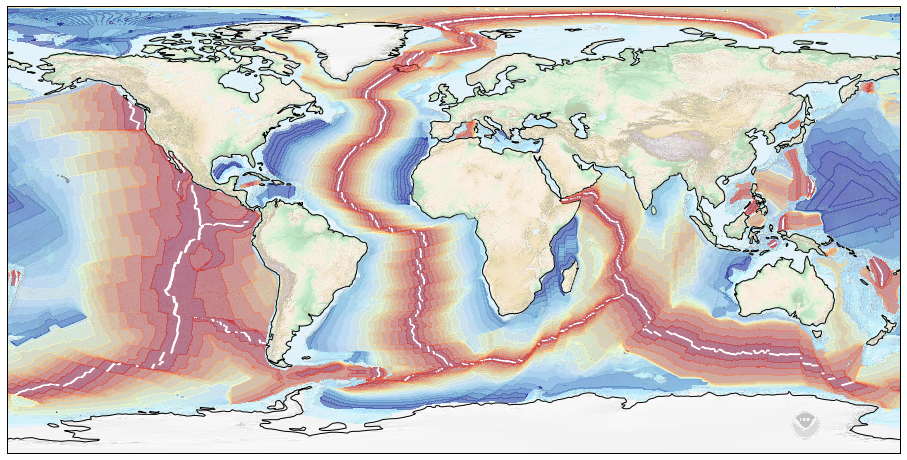

In [102]:
projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(16, 16), facecolor="none", edgecolor="none")
ax = plt.axes(projection=projection)
ax.coastlines()
ax.imshow(globaletopo_img, origin='upper', transform=base_projection, extent=global_extent, zorder=0, alpha=0.33)

cf = contourf(age_data[:,:,0], age_data[:,:,1], age_data[:,:,2], 
         levels = arange(0.5,250,10), vmin=0, vmax=150,
         transform=base_projection,  cmap="RdYlBu",zorder=2, alpha=0.5)

contour(age_data[:,:,0], age_data[:,:,1], age_data[:,:,2], levels = (0.1,0.5), colors="white", transform=base_projection)

# Want to keep the image ? Do something like this:
# plt.savefig("GlobalAgeMap.tiff", dpi=300, frameon=False, edgecolor="none", facecolor="none", bbox_inches='tight', pad_inches=0.0)
plt.show()

In [97]:
np.savez_compressed("Resources/global_age_data.3.6.z.npz",ageData=age_img)

In [90]:
ls -l Resources/

total 1584536
-rw-r--r--  1 lmoresi  staff   97372378 14 Sep 16:57 AusMagAll.tiff
-rw-r--r--  1 lmoresi  staff    4895535 14 Sep 16:37 AusMagAll.tiff.gz
-rw-r--r--  1 lmoresi  staff    4895422 14 Sep 16:56 AusMagAll.tiff.zip
-rw-r--r--  1 lmoresi  staff   10714734 14 Sep 15:39 BlueMarbleNG-TB_2004-06-01_rgb_3600x1800.TIFF
-rw-r--r--  1 lmoresi  staff   10854863 14 Sep 15:39 BlueMarbleNG-TB_2004-12-01_rgb_3600x1800.TIFF
-rw-r--r--  1 lmoresi  staff  134722670 14 Sep 15:14 EMAG2_image_V2.tif
-rw-r--r--  1 lmoresi  staff        181 14 Sep 14:28 README.md
-rw-r--r--  1 lmoresi  staff   43762944 14 Sep 16:57 color_etopo1_ice_low.tif
-rw-r--r--  1 lmoresi  staff   35751844 14 Sep 15:20 color_etopo1_ice_low.tif.zip
-rw-r--r--  1 lmoresi  staff  116407016 14 Sep 16:57 global_age_data.3.6.xyz
-rw-r--r--  1 lmoresi  staff   42454798 14 Sep 17:14 global_age_data.3.6.xyz.npz
-rw-r--r--  1 lmoresi  staff  155649704 14 Sep 17:13 global_age_data.3.6.xyz.npz.npy
-rw-r--r--  1 lmoresi  staff   33316312

In [91]:
age2 = np.load("Resources/global_age_data.3.6.xyz.npz")["agegrid"]


In [92]:
print age2.shape
print ageZ.shape

(1801, 3601, 3)
(1801, 3601)


In [33]:
print age_data[0,:,0].shape

(3601,)


In [36]:
print np.linspace(-180,180,3601).shape

(3601,)


In [49]:
print age_data[0,0,:]

[-180.         90.         55.569202]


In [39]:
age2[1,0,:]

array([-180.      ,   89.9     ,   55.370914])

In [44]:
age2[:,1,0]

array([-179.9, -179.9, -179.9, ..., -179.9, -179.9, -179.9])

In [98]:
ageData = np.load("Resources/global_age_data.3.6.z.npz")["ageData"]

lons = np.linspace(-180.0,180.0,3601)
lats = np.linspace(90, -90, 1801)
arrlons,arrlats = np.meshgrid(lons, lats)

age3[...,0] = arrlons[...]
age3[...,1] = arrlats[...]
age3[...,2] = ageData[...]


In [84]:
arrlons.shape

(1801, 3601)

In [85]:
age2.shape

(1801, 3601, 3)

In [86]:
age3 = age2.copy()

In [99]:
print age2[1,1,:]
print age3[1,1,:]

[-179.9        89.9        55.371075]
[-179.9        89.9        55.371075]
